# Import libraries & load data

In [3]:
import pandas as pd

# Load data
df = pd.read_csv('../data/togo-dapaong_qc.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# Summary stats & missing values

In [4]:
df.describe()
df.isna().sum().sort_values(ascending=False)

missing_pct = df.isna().mean() * 100
missing_pct[missing_pct > 5]

Comments    100.0
dtype: float64

#  Impute missing values & remove outliers

In [5]:
# Import zscore
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

df_clean = df.copy()

for col in cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

z_scores = df_clean[cols].apply(zscore)
mask = (z_scores.abs() <= 3).all(axis=1)
df_clean = df_clean[mask]

# Time series plots

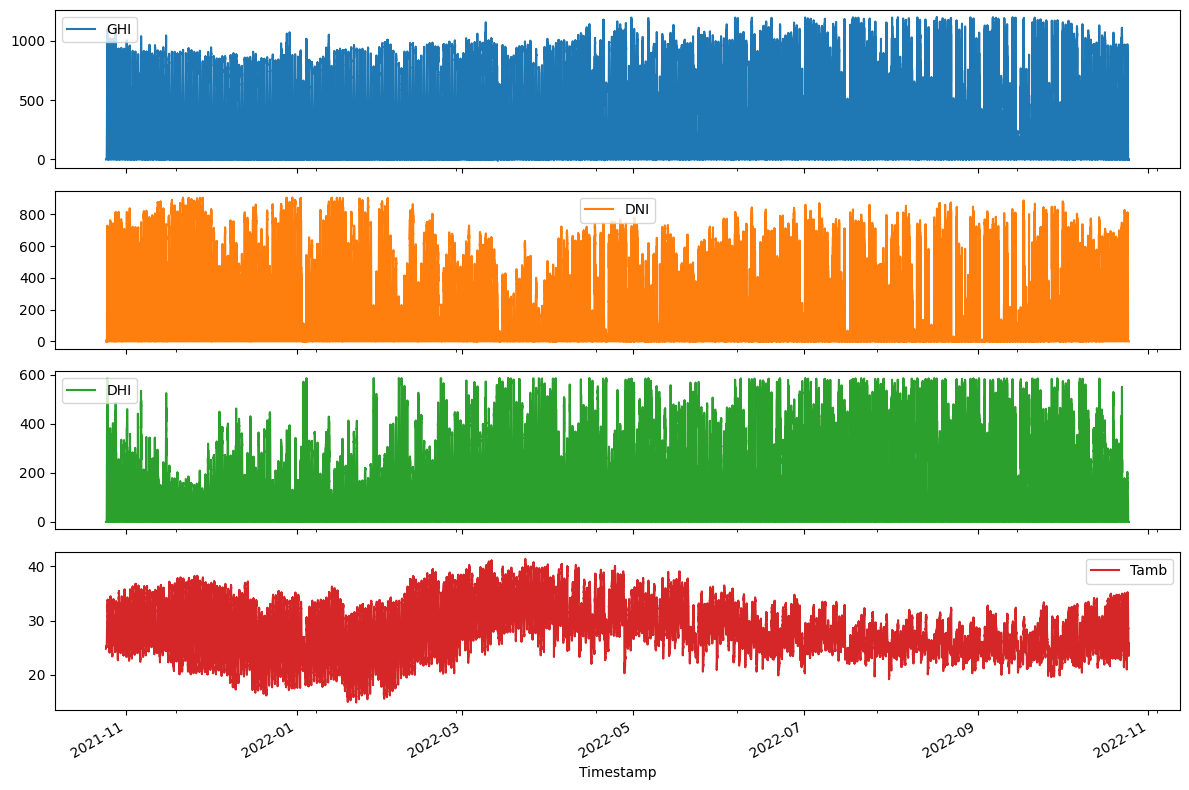

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()


# Cleaning impact on sensors

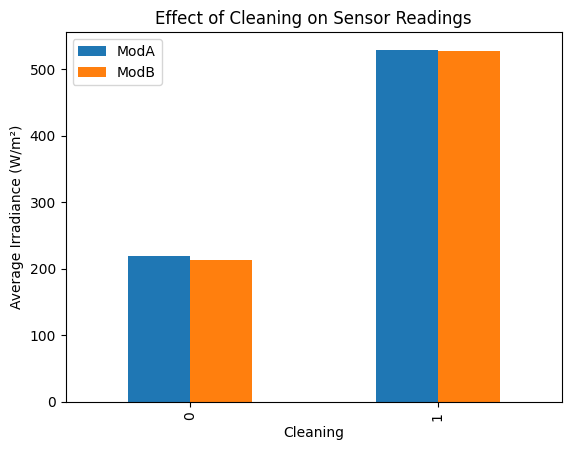

In [7]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Effect of Cleaning on Sensor Readings")
plt.ylabel("Average Irradiance (W/m²)")
plt.show()